# **UTS Data Mining - Linear Regression**

# **Nama : Andika Hartanta**
# **NPM : 2310631170067**
# **Kelas : 5A - Informatika**

## **Data Profiling (Real Estate Prediction)**

In [63]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [64]:
# Load dataset Used Cars Price Prediction

!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-07 12:50:11--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv.2’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.04s   

2025-10-07 12:50:12 (13.2 MB/s) - ‘used_cars_price_fiks.csv.2’ saved [602640/602640]



In [65]:
# Menyimpan ke dalam variabel dataset
df = pd.read_csv('/content/used_cars_price_fiks.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [66]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


In [67]:
# Menampilkan nilai statistika deskriptif setiap variabel dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.50,3009.00,4513.50,6018.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,5719.0,57545.592586,37988.496154,171.00,33923.00,53000.00,72998.00,775000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


Pada tahap Data Profiling, dilakukan proses untuk memahami struktur dan isi dari dataset.
Langkah-langkah yang dilakukan antara lain:
Melihat informasi kolom dan tipe data dengan df.info().
Menampilkan statistik deskriptif seperti mean, median, dan standar deviasi menggunakan df.describe().
Mengecek jumlah data, missing values, dan distribusi nilai di setiap kolom.
Dari tahap ini, diperoleh gambaran umum tentang data mobil bekas seperti tahun produksi, jarak tempuh, kapasitas mesin, dan harga. Tahapan ini membantu menentukan langkah cleaning dan analisis selanjutnya.

## **EDA (Exploratory Data Analysis)**

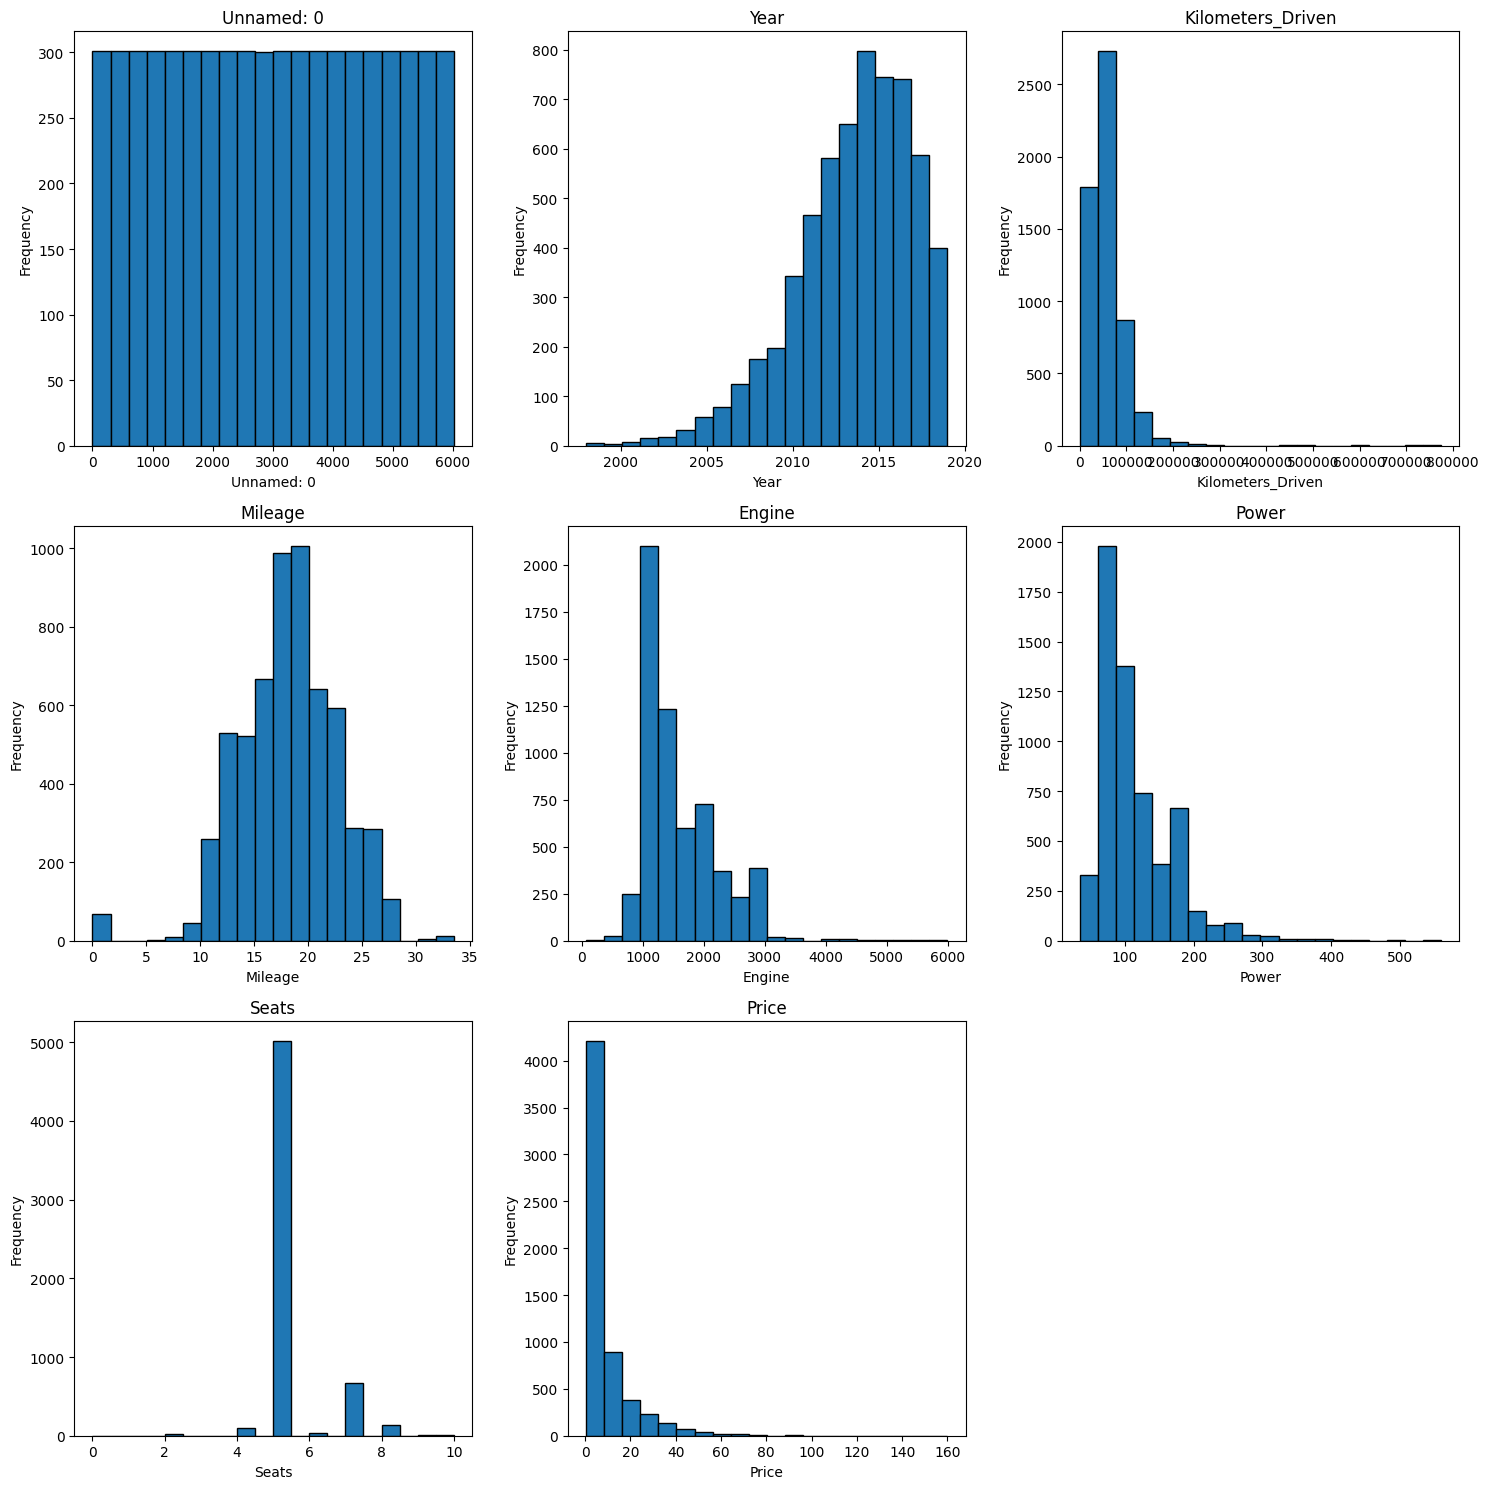

In [68]:
# Cek distribusi data numerik pada dataset dengan histogram
numeric_col = df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(numeric_col) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, col in enumerate(numeric_col):
    ax = axes[i]
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

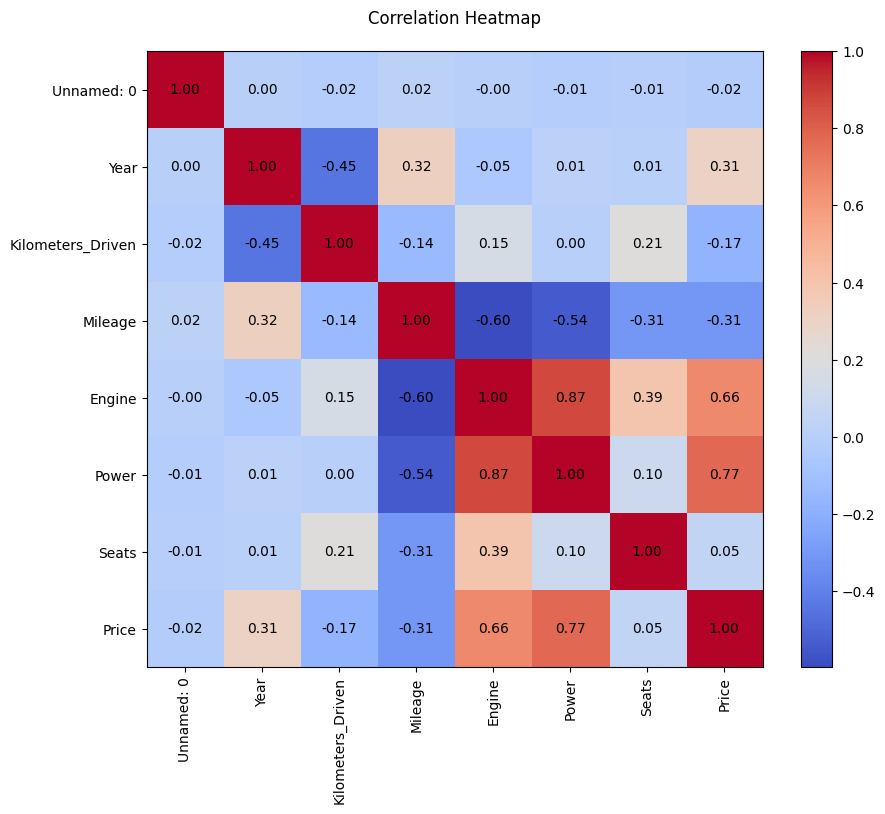

In [69]:
# Cek korelasi antar data numerik dengan heatmap
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Label sumbu
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.title("Correlation Heatmap", pad=20)
plt.show()

Tahap Exploratory Data Analysis (EDA) digunakan untuk memahami pola, distribusi, dan hubungan antar variabel dalam dataset.
Langkah yang dilakukan:

-Membuat histogram untuk melihat distribusi data numerik.

-Membuat heatmap korelasi untuk melihat hubungan antar variabel numerik.

Dari hasil analisis, terlihat fitur-fitur yang memiliki korelasi kuat terhadap Price, yang akan berguna untuk proses feature selection dan modeling.

## **Data Cleaning**

### **Remove Null Value**

In [70]:
# Buat salinan data untuk preprocessing
df_clean = df.copy()

In [71]:
# Cek nilai Null pada dataset
df_clean.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,300
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


**Karena datanya terlalu banyak buat dihapus, jadi saya isi aja**

In [72]:
# Isi nilai kosong di kolom numerik dengan nilai rata-rata kolomnya
cols_with_missing = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

for col in cols_with_missing:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

In [73]:
# Cek dataset setelah diisi nilainya
df_clean.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


### **Remove Duplicate Value**

In [74]:
# Cek duplikasi dataset
df_clean.duplicated().sum()

np.int64(0)

**Karena dataset Real Estate Prediction tidak memiliki duplikasi data, langsung saja ke tahap berikutnya**

### **Remove Column ID**

In [75]:
# Menghapus kolom ID atau kolom yang tidak memiliki nilai untuk model
df_clean.drop(['Unnamed: 0'], axis=1, inplace=True)

df_clean.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

### **Remove Outliers**

In [76]:
# Buat salinan data untuk menghapus outliers
df_outlier = df_clean.copy()

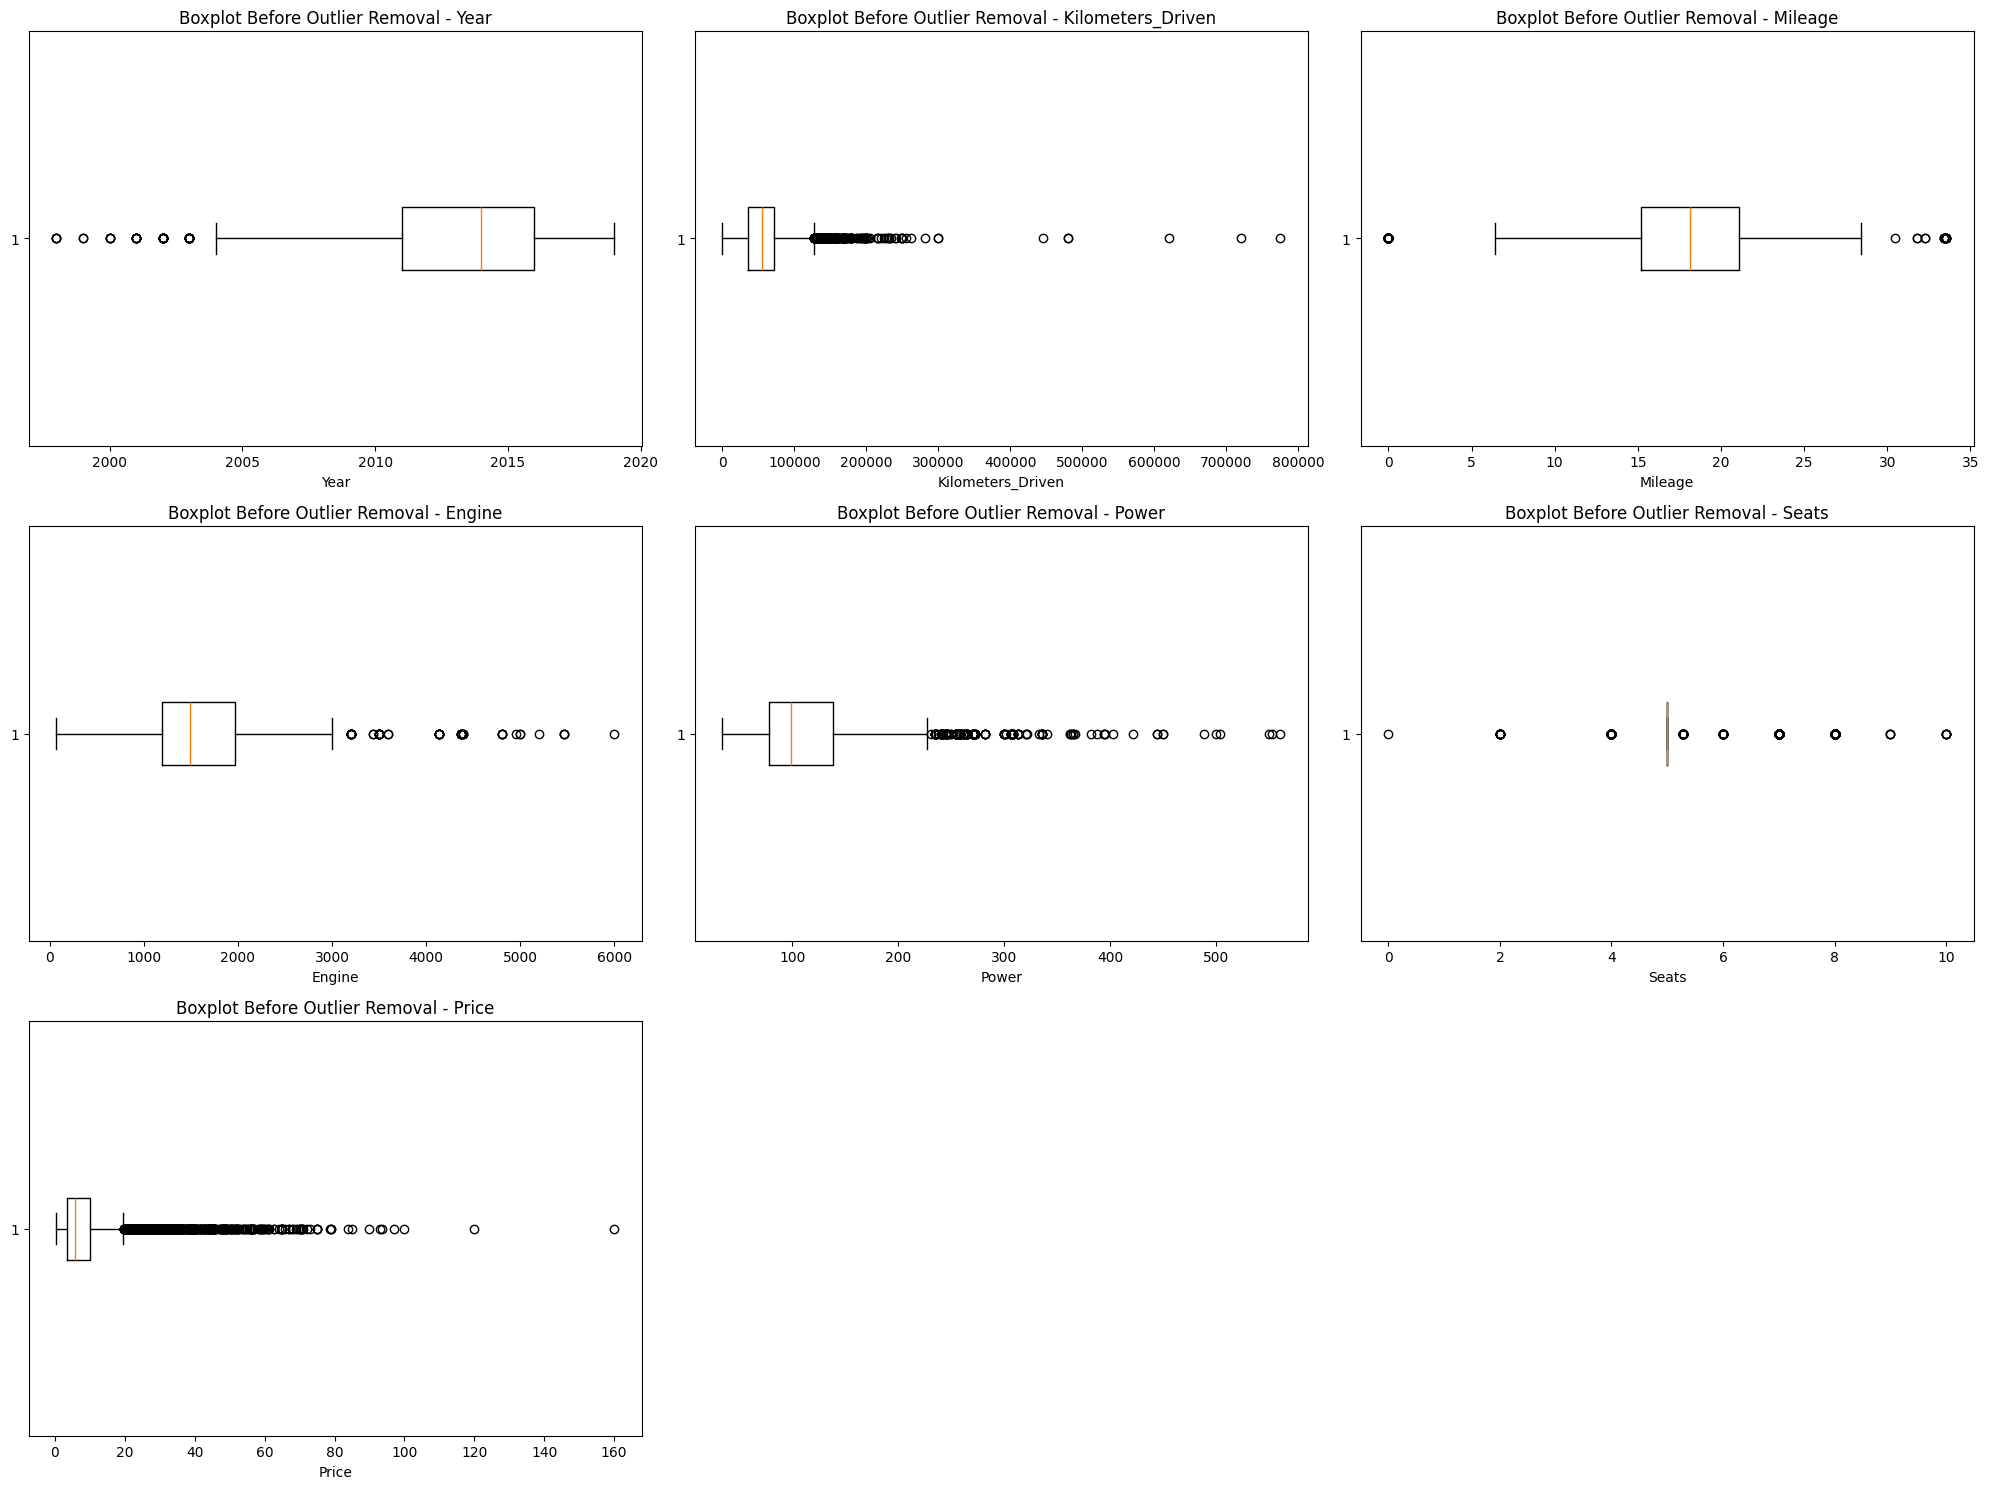

In [77]:
# Cek boxplot sebelum diatasi outliernya
num_cols = df_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [78]:
# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier = df[(df < lower_bound) | (df > upper_bound)]
    return df_outlier

# Hitung jumlah outlier tiap kolom dan simpan dalam dictionary
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df_outlier[col])
    outlier_counts[col] = len(outliers)

# Buat DataFrame dari dictionary
outlier_summary_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Tampilkan hasilnya
print("Jumlah outlier per kolom (IQR method):")
display(outlier_summary_df)

Jumlah outlier per kolom (IQR method):


,Outlier Count
Year,50
Kilometers_Driven,224
Mileage,82
Engine,61
Power,239
Seats,1005
Price,718


In [79]:
# Hapus outlier dari semua kolom numerik
def remove_outliers_iqr(df, columns):
  df_no_outlier = df.copy()

  Q1 = df_no_outlier[columns].quantile(0.25)
  Q3 = df_no_outlier[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier_filters = ~((df_no_outlier[columns] < lower) | (df_no_outlier[columns] > upper)).any(axis=1)
  df_no_outlier = df_no_outlier[outlier_filters]
  return df_no_outlier

df_no_outlier = remove_outliers_iqr(df_outlier, num_cols)

print("Jumlah data sebelum hapus outlier: ", len(df_outlier))
print("Jumlah data setelah hapus outlier: ", len(df_no_outlier))
print("Total data yang dihapus: ", len(df_outlier) - len(df_no_outlier))
print("Persentase data yang dihapus: ", round((len(df_outlier) - len(df_no_outlier)) / len(df_outlier) * 100, 2), "%")

Jumlah data sebelum hapus outlier:  6019
Jumlah data setelah hapus outlier:  4265
Total data yang dihapus:  1754
Persentase data yang dihapus:  29.14 %


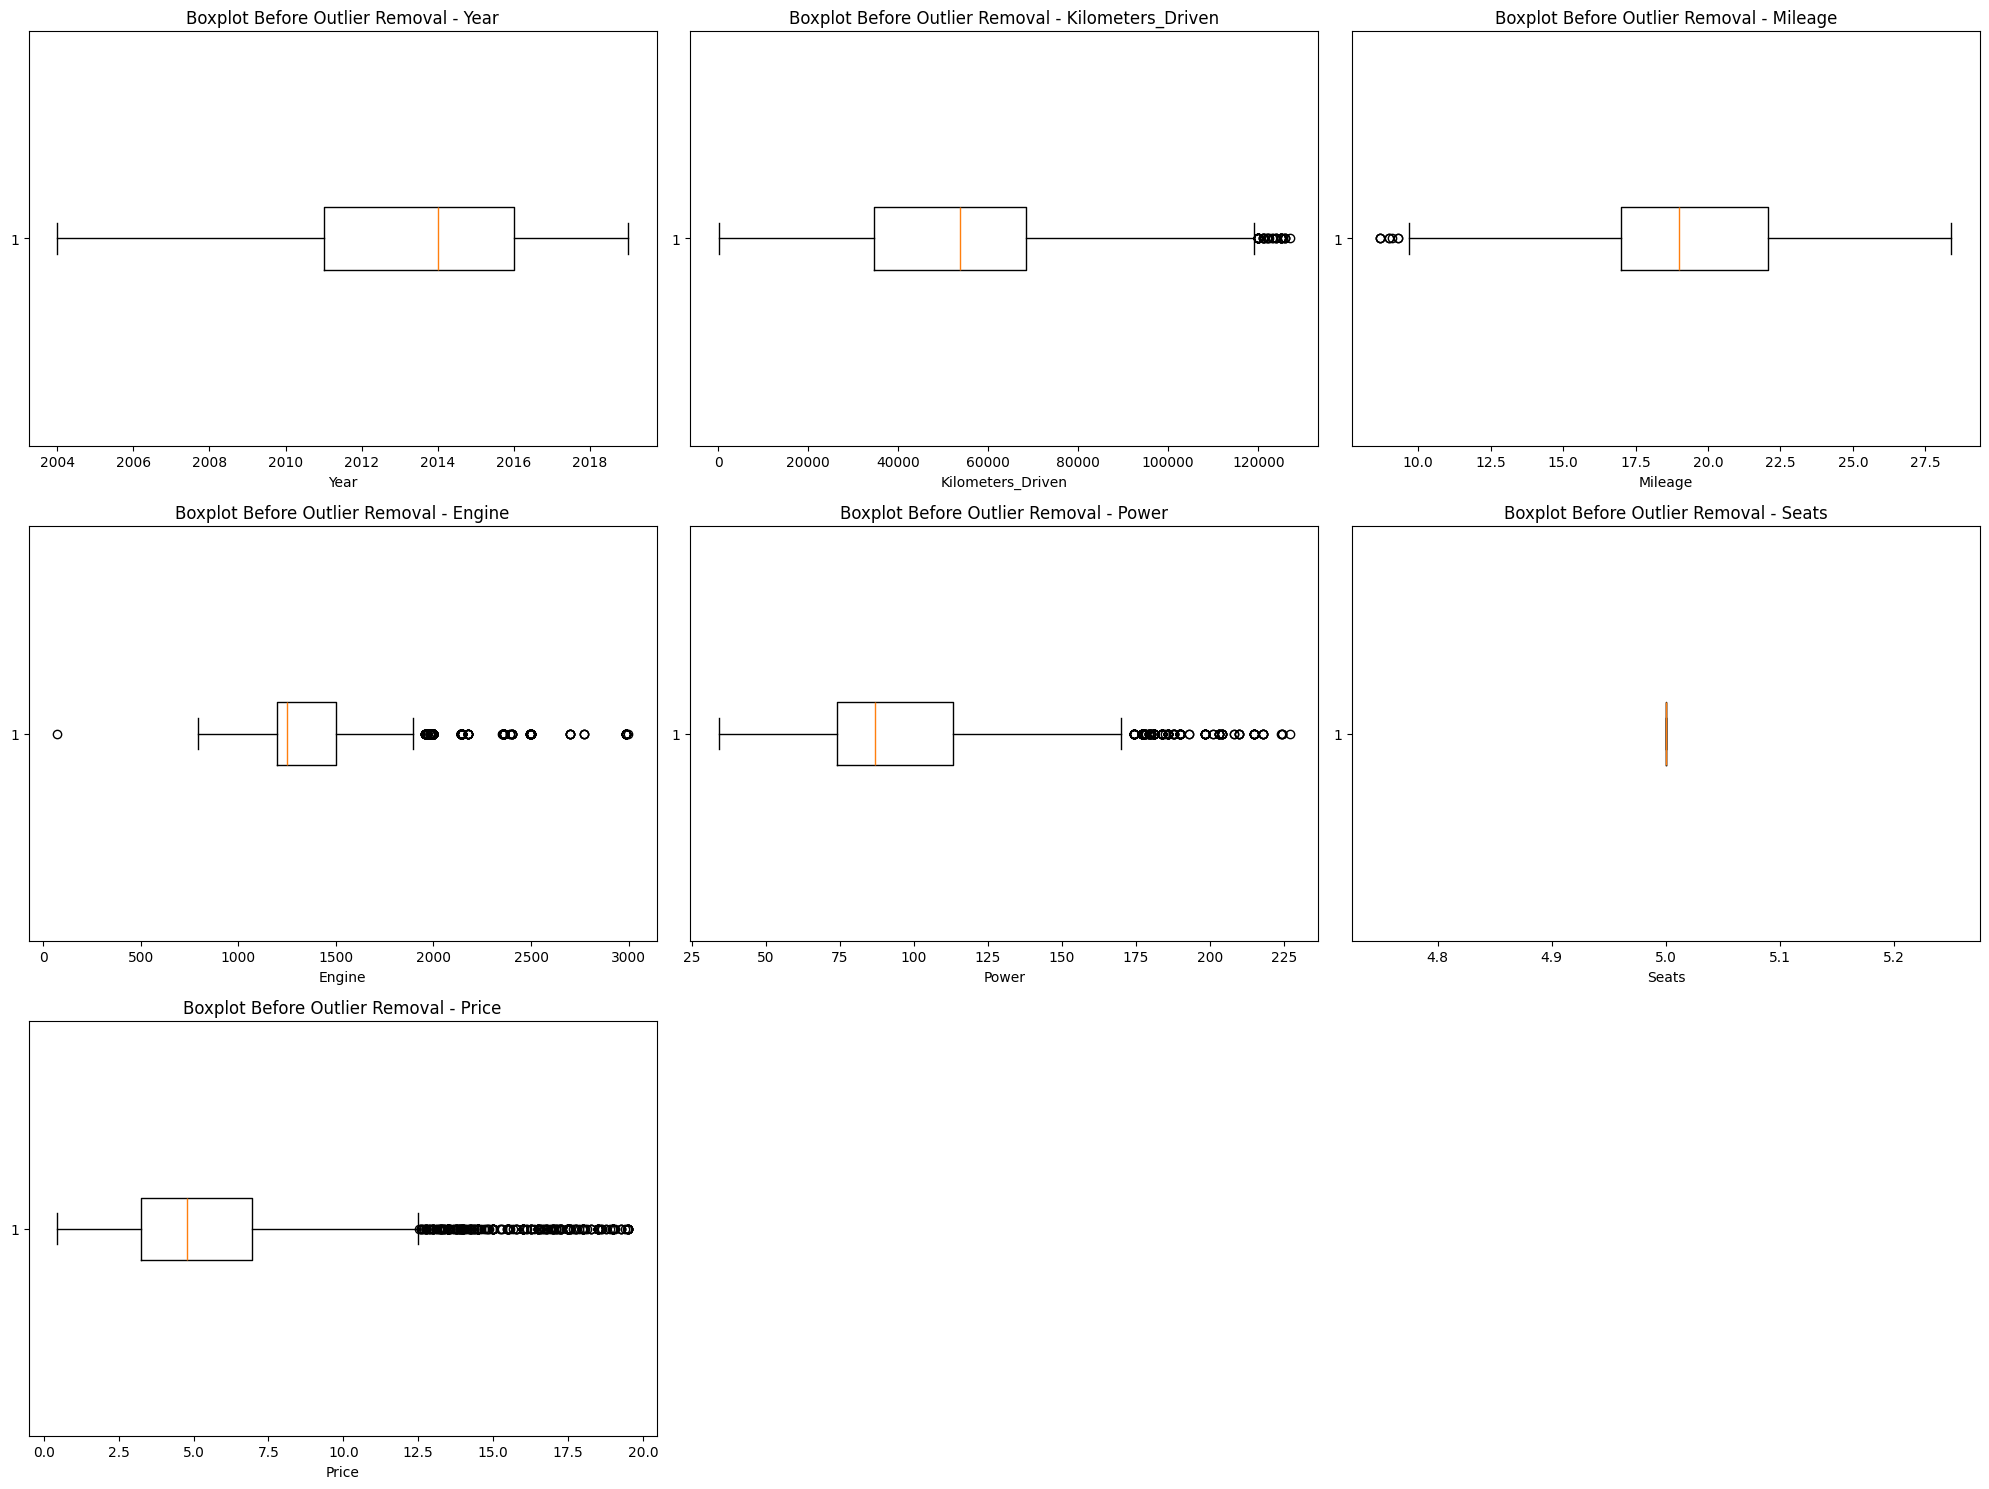

In [80]:
# Cek boxplot setelah diatasi outliernya
num_cols = df_no_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_no_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Feature Selection**

### **Variance Threshold (Filter Method)**

In [81]:
# Ambil hanya kolom numerik
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

var_thr_re = VarianceThreshold(threshold=0.1)
var_thr_re.fit_transform(df_numeric)

# Cek hasilnya
print("Features with variance > 0.1:", var_thr_re.get_support(), '\n')

# Cek hasilnya dengan kolomnya
print("Columns with variance > 0.1:", df_numeric.columns[var_thr_re.get_support()])


Features with variance > 0.1: [ True  True  True  True  True  True  True] 

Columns with variance > 0.1: Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


*True = high variance*

*False = low variance*

In [82]:
# Cek perbandingan jumlah keduanya
print("Total features:", len(var_thr_re.get_support()))
print("Features with variance > 0.1:", len(df_numeric.columns[var_thr_re.get_support()]))

Total features: 7
Features with variance > 0.1: 7


**Menampilkan fitur/kolom dengan low variance**

In [83]:
# Menggunakan list comprehension untuk mendapatkan kolom-kolom low variance
low_var_re = [column for column in df_numeric.columns
              if column not in df_numeric.columns[var_thr_re.get_support()]]

# Tampilkan menggunakan for loop
print("Low variance features:")
for features in low_var_re:
  print(features)

Low variance features:


**Karena tidak ada nilai low variance, maka lanjut saja**

In [84]:
# Cek dataset setelah seleksi fitur menggunakan Variance Threshold
df_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [85]:
# Simpan dataset final
df_final = df_clean.copy()
df_final

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [86]:
# Menampilkan nilai statistika deskriptif setiap variabel dataset
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,57545.592586,37029.520244,171.00,35000.00,55000.00,71801.50,775000.00
Mileage,6019.0,18.134961,4.581528,0.00,15.17,18.15,21.10,33.54
Engine,6019.0,1621.276450,599.553865,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.0,113.253050,53.231019,34.20,78.00,98.60,138.03,560.00
Seats,6019.0,5.278735,0.806012,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


Pada tahap Data Cleaning, data dibersihkan agar hasil model lebih akurat.
Langkah-langkah yang dilakukan:

-Mengisi missing values dengan nilai rata-rata.

-Mengecek dan menghapus duplikasi data.

-Menghapus kolom ID yang tidak relevan.

-Menghapus outlier menggunakan metode IQR (Interquartile Range).

-Melakukan Variance Threshold untuk menyaring fitur dengan variansi rendah.

Setelah tahap ini, dataset sudah bersih, bebas dari nilai kosong dan outlier, serta siap digunakan untuk tahap modeling.

## **Modelling**

### **Feature Scaling**

In [87]:
# Menggunakan z-score atau standard scaler
scaler = StandardScaler()

# Pisahkan kolom prediktor dengan kolom target
X = df_final.drop('Price', axis=1)
y = df_final['Price']

# Encode kolom kategorik (karena masih ada data string)
categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scaling
X = scaler.fit_transform(X)

# Cek hasil scaling
print(X)

[[ 0.53612979  1.14365818 -1.02713851 ... -1.03965343 -1.03506616
  -0.34584877]
 [-0.76255183  1.48198899  0.50216112 ... -0.0655149   0.24324212
  -0.34584877]
 [-0.81162991 -1.22465746 -0.72127858 ... -0.7043763  -0.46129287
  -0.34584877]
 ...
 [ 0.030248    0.12866576 -0.41541866 ...  1.46241471 -0.0235418
   3.37648875]
 [ 0.54934312  0.80532737 -0.10955873 ... -1.03965343 -0.86710502
  -0.34584877]
 [-1.41755549 -0.20966505 -0.72127858 ... -1.14307225 -1.04558722
  -0.34584877]]


In [88]:
# Split dataset ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# Cek data masing-masing
print("Jumlah data latih:", X_train.shape)
print("Jumlah data uji:", X_test.shape)

Jumlah data latih: (4815, 11)
Jumlah data uji: (1204, 11)


In [89]:
# Modelling dengan model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [90]:
# Cek parameter model
print("Intercept:", model_lr.intercept_)
print("Coefficient:", model_lr.coef_)

Intercept: 9.540732111045935
Coefficient: [ 0.20642856 -0.66565893  3.0646824  -0.79265055 -1.36073128 -1.13438256
 -0.03397635 -0.96319123  0.69105972  6.57662525 -0.95484701]


Pada tahap Modeling, dilakukan proses pembuatan model prediksi harga mobil bekas menggunakan Linear Regression.Langkah-langkahnya:

-Melakukan encoding untuk kolom kategori menggunakan LabelEncoder.

-Melakukan feature scaling dengan StandardScaler.

-Membagi dataset menjadi data latih dan data uji (train-test split).

-Melatih model menggunakan LinearRegression() dari Scikit-Learn.

Hasilnya diperoleh nilai intercept dan coefficient yang menunjukkan pengaruh masing-masing fitur terhadap harga mobil.

### **Model Evaluation**

In [91]:
# Evaluasi model dengan metrik evaluasi regresi (R2, MAE, MSE, RMSE)
# y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Membuat dataframe untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Mengurutkan index
comparison_df = comparison_df.sort_index()
# Mereset index
comparison_df = comparison_df.reset_index(drop=True)
# Tampilkan hasil
comparison_df

,Actual,Predicted
0,6.00,2.988810
1,3.50,2.108478
2,1.95,3.784680
3,9.95,10.318911
4,5.40,8.789052
...,...,...
1199,5.75,7.144393
1200,5.11,6.678429
1201,7.75,7.559696
1202,3.25,4.695252


In [92]:
# Hitung metrik evaluasi
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)

# Membuat dataframe nilai evaluasi
score = pd.DataFrame({
    'Metrik': ['R2', 'MAE', 'MSE', 'RMSE'],
    'Nilai': [r2_test, mae_test, mse_test, rmse_test]
})

score

,Metrik,Nilai
0,R2,0.695784
1,MAE,3.824028
2,MSE,36.154708
3,RMSE,6.012878


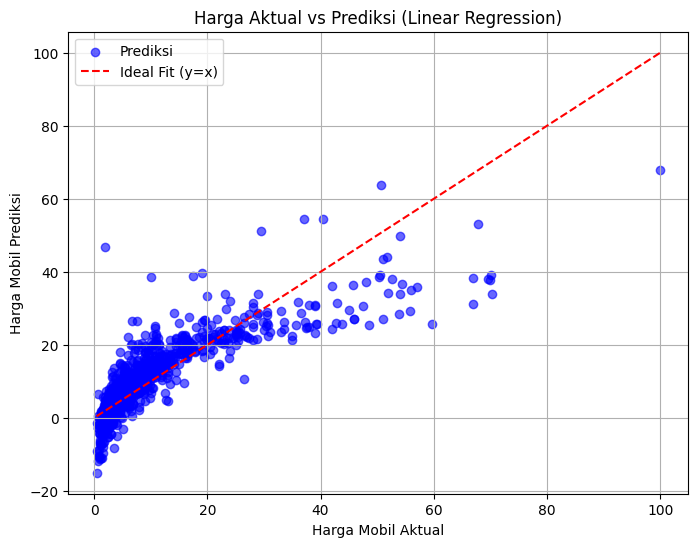

In [93]:
# Scatter plot untuk hasil prediksi regresi linear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label='Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.xlabel('Harga Mobil Aktual')
plt.ylabel('Harga Mobil Prediksi')
plt.title('Harga Aktual vs Prediksi (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

Tahap Model Evaluation digunakan untuk mengukur performa model yang telah dibuat.
Evaluasi dilakukan menggunakan metrik:

-R² Score untuk melihat seberapa baik model menjelaskan variabel target.

-MAE, MSE, dan RMSE untuk mengukur seberapa besar error dari prediksi.

-Membandingkan nilai aktual dan nilai prediksi dalam bentuk tabel.

Dari hasil evaluasi, dapat dilihat bahwa model sudah mampu memprediksi harga mobil bekas dengan cukup baik berdasarkan fitur-fitur yang digunakan.